In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path="test_set1_rotated_all_methods_analise.csv"
data = pd.read_csv(path) 
#txt=open(path, "r+")
erro_hough= (abs(data["Hough"] + data["Esperado"])) % 180
erro_fourier= (abs(data["Fourier"] + data["Esperado"])) % 180
erro_hproj= (abs(data["Hprojection"] + data["Esperado"])) % 180
erro_p_hough= (abs(data["P_Hough"] + data["Esperado"])) % 180
erro_p_fourier= (abs(data["P_Fourier"] + data["Esperado"])) % 180
erro_p_hproj= (abs(data["P_Hprojection"] + data["Esperado"])) % 180
erro_media=data["erro_media"]
erro_mediana=data["erro_mediana"]
erro_moda=(abs(data["Moda"] + data["Esperado"])) % 180
formatação_dici={'fontsize': 11,
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
erro_p_hproj.value_counts()

0      418
90     117
1       90
91      22
89      22
2       10
88       8
3        3
7        3
93       2
86       2
85       2
83       2
19       1
4        1
6        1
9        1
10       1
12       1
102      1
26       1
29       1
30       1
45       1
99       1
84       1
87       1
92       1
94       1
96       1
67       1
dtype: int64

In [3]:
def moda(vetor):
    ocorrencia={}
    for i in vetor:
        if i not in ocorrencia:
            ocorrencia[i]=1
        else:
            ocorrencia[i]+=1
            
    max_ocorrencia=0
    max_value=0
    unico=True
    for value in ocorrencia:
        if(ocorrencia[value] > max_ocorrencia):
            unico=True
            max_value=value
            max_ocorrencia=ocorrencia[value]
        elif ocorrencia[value] == max_ocorrencia:
            unico=False
    if(unico):
        return max_value
    else:
        return get_mediana(vetor)
    

def get_mediana(vetor):
    v=sorted(vetor)
    if(len(v)%2==1):
        return v[len(v)//2]
    return v[int(len(v)/2) -1]

def calculate_Y_axis(erro):
    dicionario=erro.value_counts().to_dict()
    vetor=np.zeros(181)
    for i in dicionario:
        vetor[int(i)]=dicionario[i]   
    return vetor

def calculate_Y_axis2(erro):
    dicionario=erro.value_counts().to_dict()
    vetor=np.zeros(46)
    for i in dicionario:
        val=int(i) % 90
        if(val>=45 and val <90):
            val=45-(val%45)

        vetor[val]+=dicionario[i]   
    return vetor    

181 181


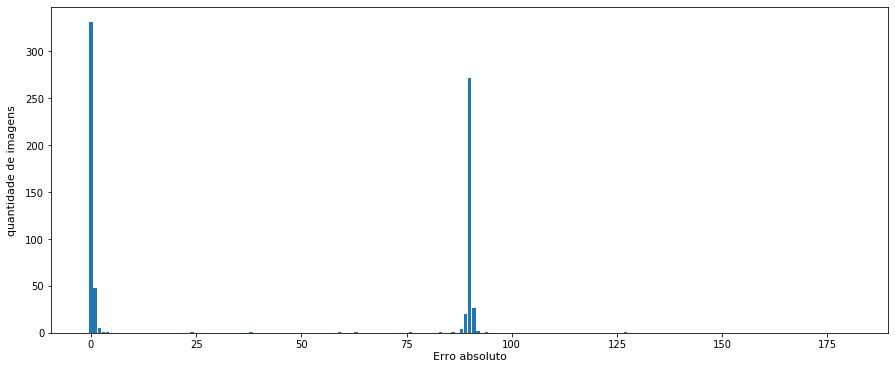

46 46


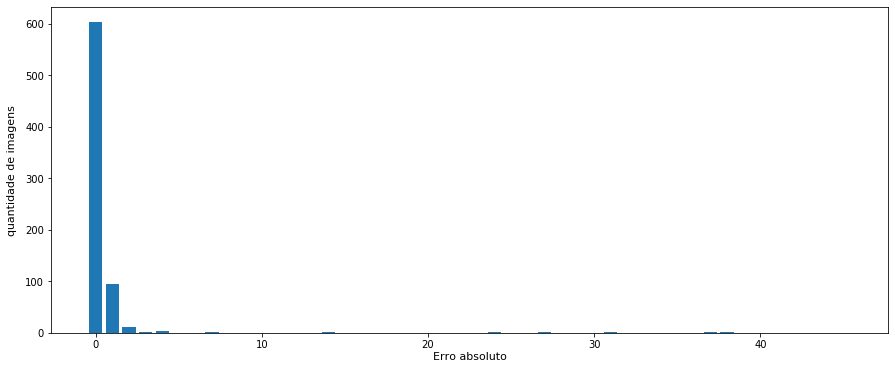

In [4]:
x=np.arange(181)
y=calculate_Y_axis(erro_hproj)
fig, axes=plt.subplots(figsize=(15,6))
print(len(x),(len(y)))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Projeção Horizontal em relação ao angulo original")
plt.savefig("graphs/HPROJ_ERRO1.jpeg")
plt.show()

x=np.arange(46)
y=calculate_Y_axis2(erro_hproj)
fig, axes=plt.subplots(figsize=(15,6))
print(len(x),(len(y)))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Projeção Horizontal em relação ao mais proximo multiplo de 90")
plt.savefig("graphs/HPROJ_ERRO2.jpeg")

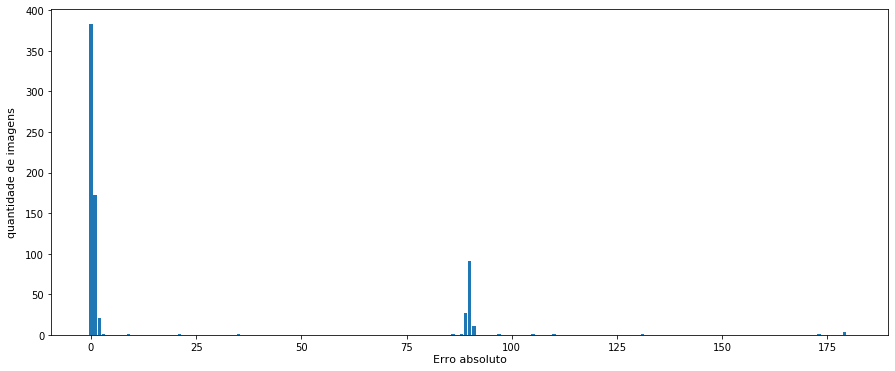

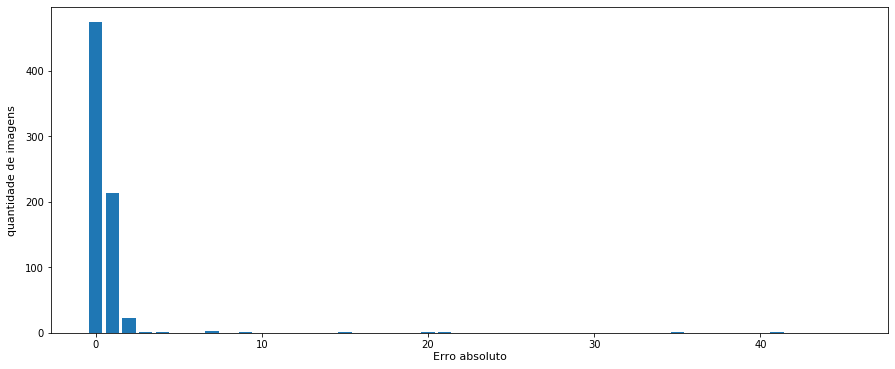

In [5]:
x=np.arange(181)
y=calculate_Y_axis(erro_hough)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Hough em relação ao angulo original")
plt.savefig("graphs/ERRO_HOUGH1.jpeg")
plt.show()

x=np.arange(46)
y=calculate_Y_axis2(erro_hough)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Hough em relação ao mais proximo multiplo de 90")
plt.savefig("graphs/ERRO_HOUGH2.jpeg")
plt.show()

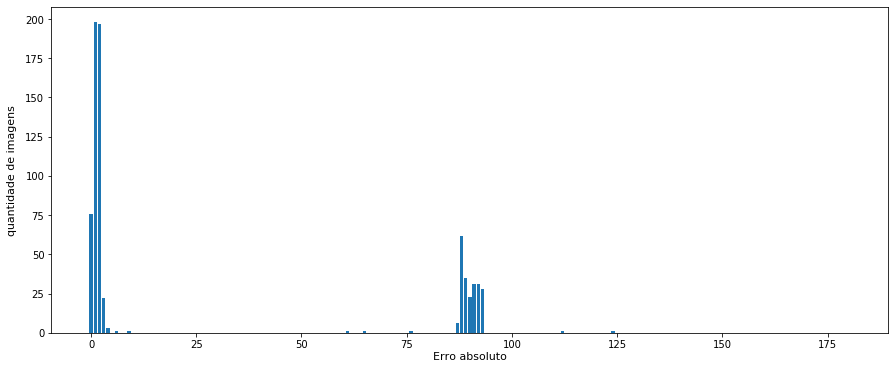

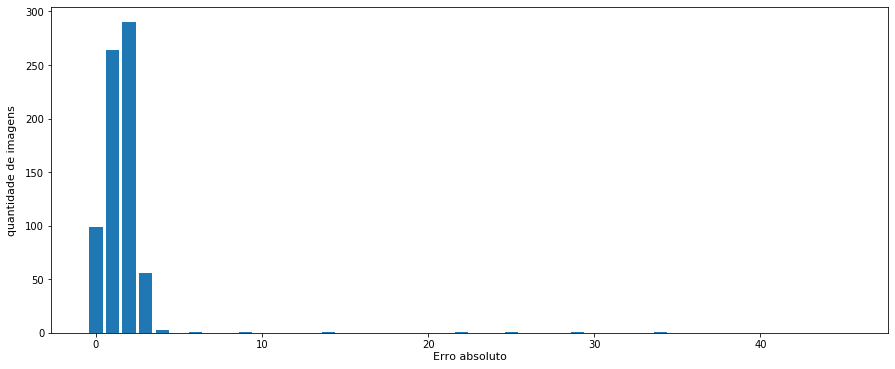

In [6]:
x=np.arange(181)
y=calculate_Y_axis(erro_fourier)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Fourier em relação ao angulo original")
plt.savefig("graphs/ERRO_FOURIER1.jpg")
plt.show()

x=np.arange(46)
y=calculate_Y_axis2(erro_fourier)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Fourier em relação ao mais proximo multiplo de 90")
plt.savefig("graphs/ERRO_FOURIER2.jpg")
plt.show()


181 181


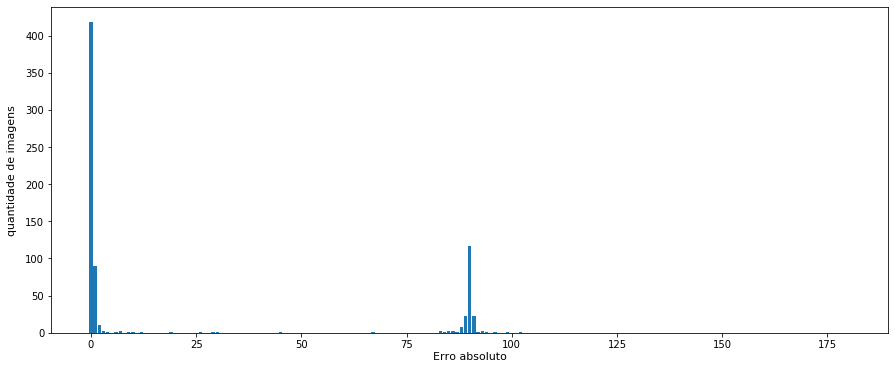

46 46


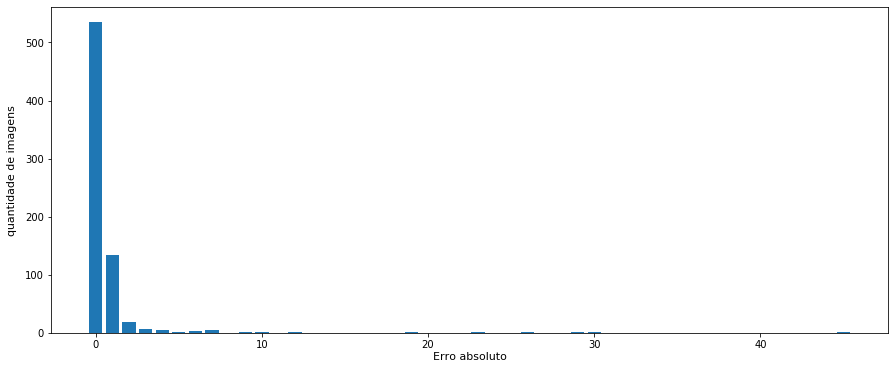

In [7]:

x=np.arange(181)
y=calculate_Y_axis(erro_p_hproj)
fig, axes=plt.subplots(figsize=(15,6))
print(len(x),(len(y)))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Projeção Horizontal em blocos em relação ao angulo original")
plt.savefig("graphs/PART_HPROJ_ERRO1.jpeg")
plt.show()

x=np.arange(46)
y=calculate_Y_axis2(erro_p_hproj)
fig, axes=plt.subplots(figsize=(15,6))
print(len(x),(len(y)))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Projeção Horizontal em blocos em relação ao mais proximo multiplo de 90")
plt.savefig("graphs/PART_HPROJ_ERRO2.jpeg")

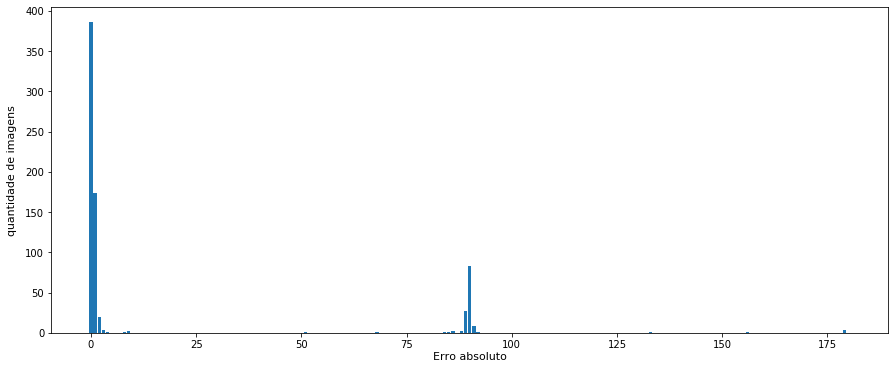

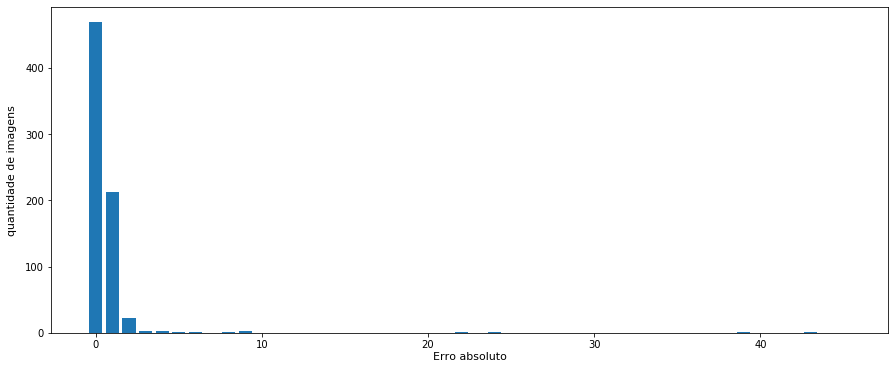

In [8]:
x=np.arange(181)
y=calculate_Y_axis(erro_p_hough)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Hough em blocos em relação ao angulo original")
plt.savefig("graphs/PART_ERRO_HOUGH1.jpeg")
plt.show()

x=np.arange(46)
y=calculate_Y_axis2(erro_p_hough)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Hough em blocos em relação ao mais proximo multiplo de 90")
plt.savefig("graphs/PART_ERRO_HOUGH2.jpeg")
plt.show()

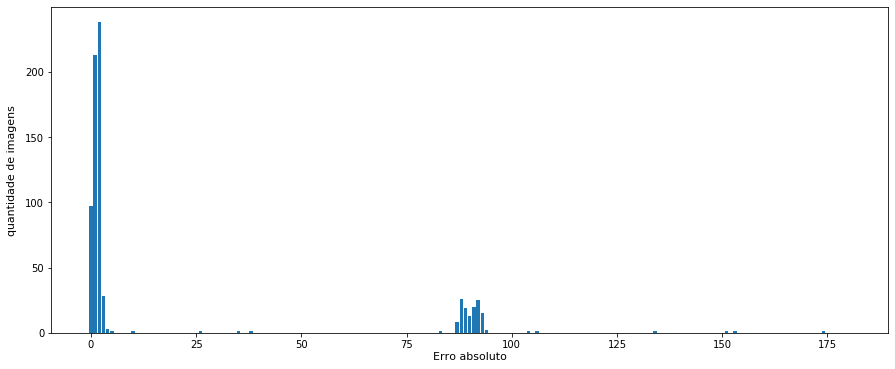

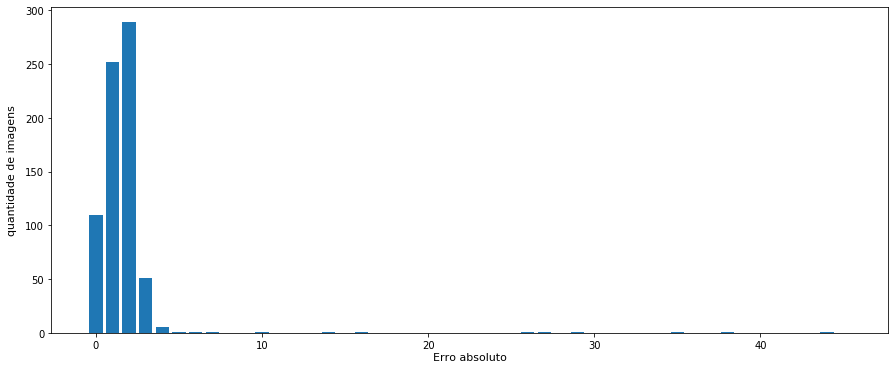

In [15]:
x=np.arange(181)
y=calculate_Y_axis(erro_p_fourier)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Fourier em blocos em relação ao angulo original")
plt.savefig("graphs/PARTERRO_FOURIER1.jpg")
plt.show()

x=np.arange(46)
y=calculate_Y_axis2(erro_p_fourier)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Fourier em blocos em relação ao mais proximo multiplo de 90")
plt.savefig("graphs/PART_ERRO_FOURIER2.jpg")
plt.show()


Text(0.5, 1.0, 'ERRO MEDIA')

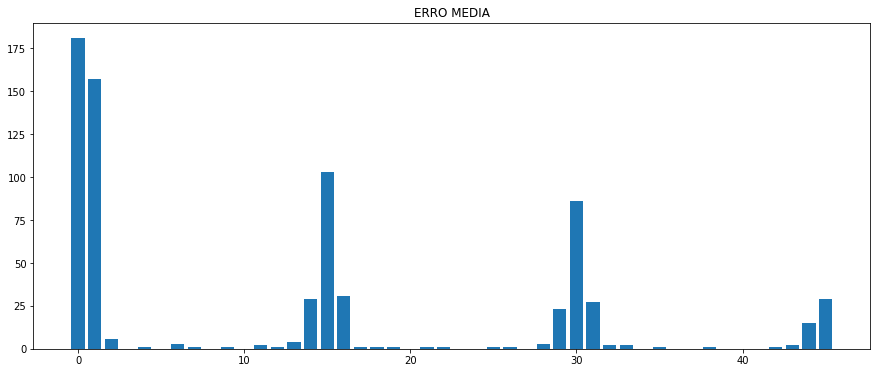

In [49]:
x=np.arange(46)
y=calculate_Y_axis2(erro_media)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.title("ERRO MEDIA")

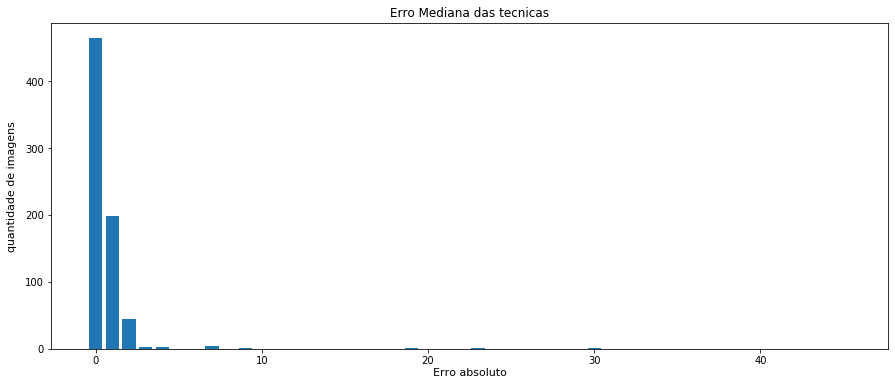

In [50]:
x=np.arange(46)
y=calculate_Y_axis2(erro_mediana)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.title("Erro Mediana das tecnicas")
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
plt.savefig("partite_ERRO_MEDIAna.jpg")

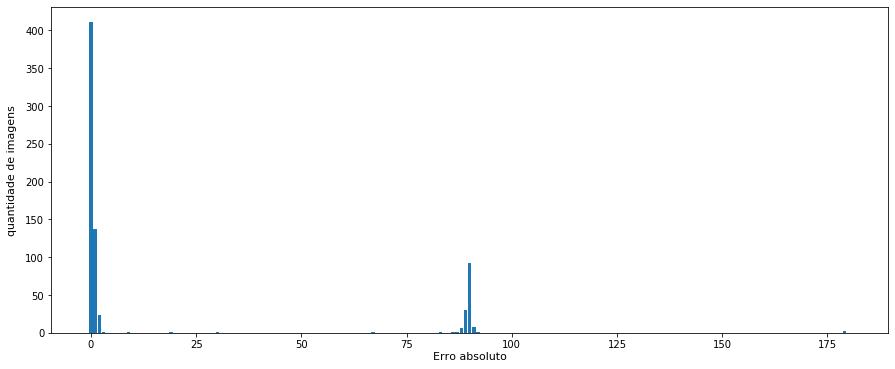

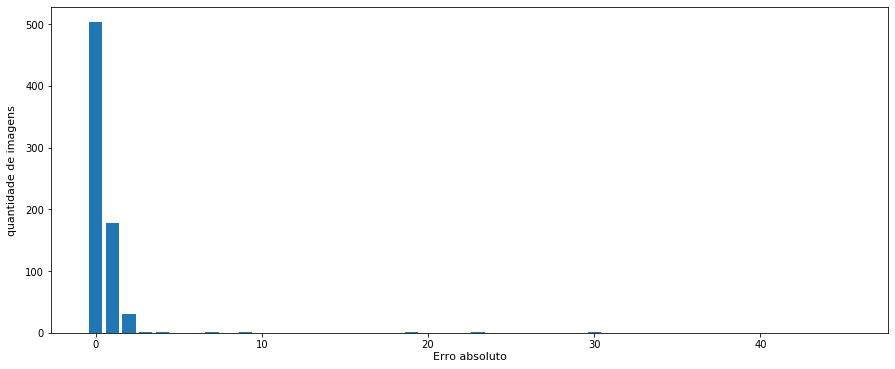

In [14]:
x=np.arange(181)
y=calculate_Y_axis(erro_moda)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Fourier em blocos em relação ao angulo original")
plt.savefig("graphs/ERRO_Moda1.jpg")
plt.show()

x=np.arange(46)
y=calculate_Y_axis2(erro_moda)
fig, axes=plt.subplots(figsize=(15,6))
axes.bar(x, y)
plt.ylabel("quantidade de imagens", formatação_dici, labelpad=10)
plt.xlabel("Erro absoluto", formatação_dici, labelpad=10)
#plt.title("Erro Transformada de Fourier em blocos em relação ao mais proximo multiplo de 90")
plt.savefig("graphs/ERRO_moda2.jpg")
plt.show()


In [17]:
def classificar(erros):
    total=[0,0,0,0]
    dicionario=erros.value_counts().to_dict()

    for instancia in erros:
        ins=instancia%90
        if(ins>45):
            ins=45-(ins%45)
            
        if(ins <=2):
            total[0]+=1
        elif(ins<=5):
            total[1]+=1
        elif(ins<=10):
            total[2]+=1
        else:
            print(ins)
            total[3]+=1
    return total

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

        
def generate_classification_chart(erros, title,save):
    fig, ax = plt.subplots(figsize=(15,6))
    width=0.8
    y=classificar(erros)
    x=["Aceitavel", "erro baixo", "erro medio", "erro grande"]
    bar_plot = ax.bar(x, y, width)
    ax.set_ylabel('Amount')
    plt.title(title)
    for rect in bar_plot:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    #return bar_plot
    plt.savefig(save)
    plt.show()

23.0
19.0
30.0


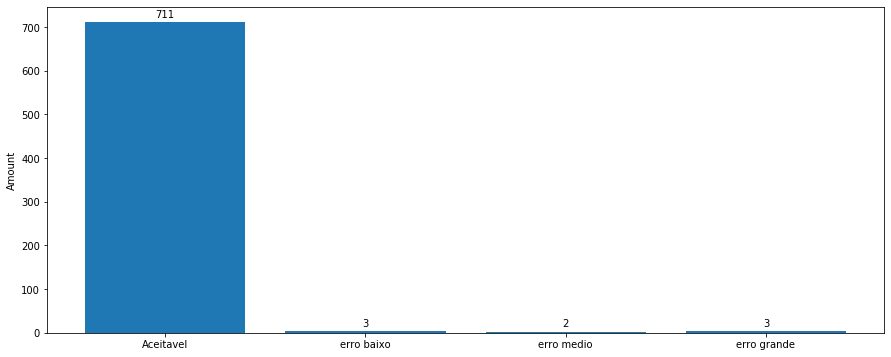

In [19]:
generate_classification_chart(erro_moda,"", "graphs/c1.jpg")

23.0
19.0
30.0


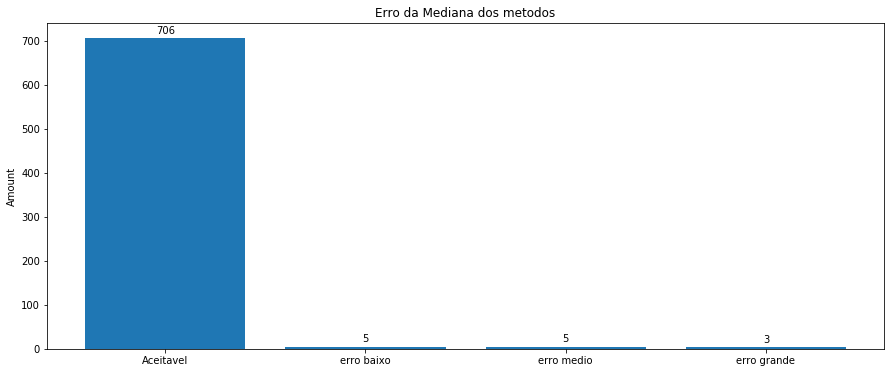

In [68]:
generate_classification_chart(erro_mediana,"Erro da Mediana dos metodos","graphs/c2.jpg")

27
14
38
24
37
31


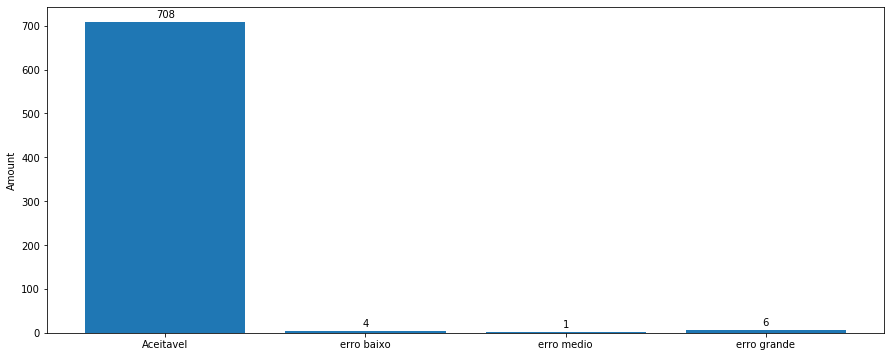

In [22]:
generate_classification_chart(erro_hproj,"","graphs/c3.jpg")

20.0
41.0
35.0
15.0
21.0


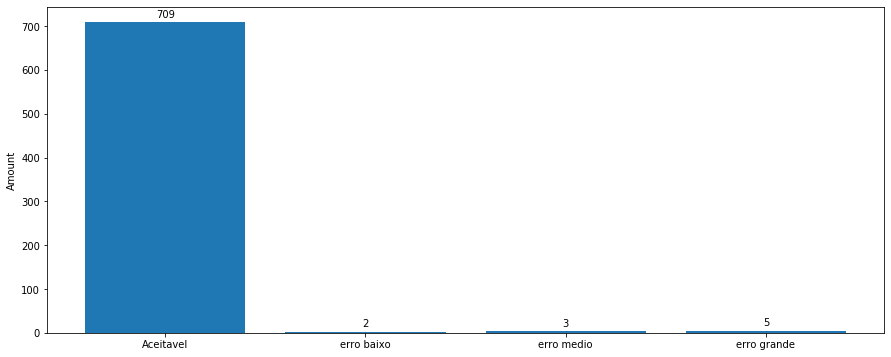

In [21]:
generate_classification_chart(erro_hough,"","graphs/c4.jpg")

In [61]:
(erro_hough%90).value_counts()

0.0     474
1.0     183
89.0     30
2.0      21
21.0      1
15.0      1
86.0      1
88.0      1
9.0       1
83.0      1
35.0      1
41.0      1
3.0       1
7.0       1
20.0      1
dtype: int64

In [10]:
data.head()

,Unnamed: 0,imagem,Hprojection,Hough,Fourier,P_Hprojection,P_Hough,P_Fourier,Esperado,index_img,Mediana,Media,Moda,erro_mediana,erro_media,erro_moda
0,0,50646501-6511.page_3..png,82,82.0,84.0,82,82.0,84.0,-83,0,82.0,83.0,82.0,1.0,0.0,1.0
1,1,50448615-8615.page_0..png,4,4.0,3.0,4,4.0,3.0,-4,1,4.0,4.0,4.0,0.0,0.0,0.0
2,2,71989648.page_0..png,54,54.0,55.0,54,54.0,55.0,-54,2,54.0,54.0,54.0,0.0,0.0,0.0
3,3,2057444860.page_0..png,-68,-67.0,-69.0,-68,-68.0,-69.0,68,3,-68.0,-68.0,-68.0,0.0,0.0,0.0
4,4,0060200963.page_1..png,50,-40.0,51.0,50,-40.0,51.0,-50,4,50.0,20.0,50.0,0.0,30.0,0.0


In [5]:
data[data["erro_moda"]>10]

,Unnamed: 0,imagem,Hprojection,Hough,Fourier,P_Hprojection,P_Hough,P_Fourier,Esperado,index_img,Mediana,Media,Moda,erro_mediana,erro_media,erro_moda
257,257,2023282942.page_0..png,48,-79.0,32.0,23,-44.0,44.0,44,257,23.0,4.0,23.0,23.0,42.0,23.0
499,499,0001246471.page_2..png,-21,68.0,-24.0,50,69.0,71.0,-69,499,50.0,36.0,50.0,19.0,33.0,19.0
667,667,2042015448.page_0..png,-63,48.0,-61.0,-3,28.0,26.0,-27,667,-3.0,-4.0,-3.0,30.0,31.0,30.0
